In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data=pd.read_csv(r"my_dataset.csv")

In [5]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
data.type.value_counts()

type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

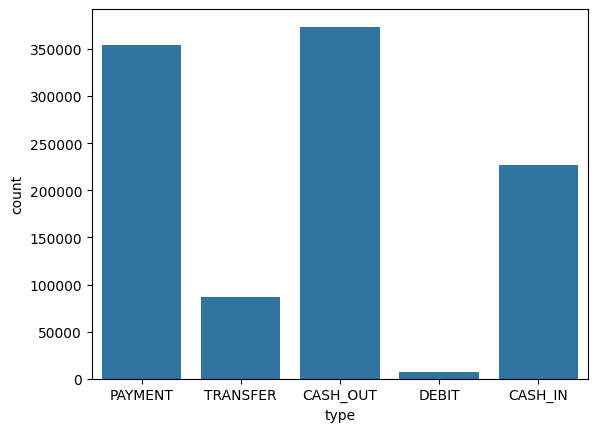

In [8]:
sns.countplot(x='type', data=data)


<Axes: xlabel='type', ylabel='amount'>

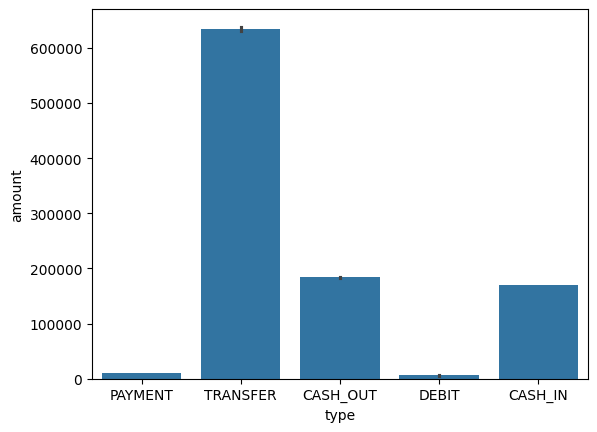

In [9]:
sns.barplot(x='type', y='amount', data=data)

In [11]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 14.2 MB/s eta 0:00:00m eta 0:00:010:00:01


In [13]:
type= data['type'].value_counts()
transaction= type.index
quantity = type.values

import plotly.express as px
figure = px.pie(data,
               values=quantity,
               names=transaction,hole=0.5,
               title="Distribution of Transaction Type")
figure.show()


In [14]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(data.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


In [15]:
# splitting the data
from sklearn.model_selection import train_test_split
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [18]:
# training a machine learning model using Decision tree
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9994354248046875


In [19]:
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[4, 9000.60, 9000.60, 0.0]])
print(model.predict(features))

['Fraud']


In [20]:
features1 = np.array([[1, 10000.0, 5000.0, 5000.0]])  
print(model.predict(features1))


['No Fraud']


In [21]:
features2 = np.array([[5, 8000.50, 4000.0, 3000.0]])
print(model.predict(features2))

['No Fraud']


In [24]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [28]:
import pickle

# Load the model from the file
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Assuming you have new data `xtest` to predict on
predictions = loaded_model.predict(xtest)

# Print or process predictions
print(predictions)

['No Fraud' 'No Fraud' 'No Fraud' ... 'No Fraud' 'No Fraud' 'No Fraud']


In [30]:
features = np.array([[4, 9000.60, 9000.60, 0.0]])

# Make a prediction
prediction = loaded_model.predict(features)

# Print the prediction
print("Prediction:", prediction)

Prediction: ['Fraud']
